In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#for creating a dataset we import 
from sklearn.datasets import make_classification

In [54]:
x,y=make_classification(n_samples=2000,n_features=20,n_classes=2,weights=[1,1],random_state=1)  # weights shows : dataset is balanced

In [55]:
x.shape

(2000, 20)

In [56]:
real_x=pd.DataFrame(x) #converting two dimensional array of shape (2000,20) in a dataframe. 
real_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.620707,1.397695,0.103500,1.385401,-1.237295,1.082837,-1.654283,0.469496,-2.237462,1.230529,0.464746,1.219494,-0.352217,-0.125903,0.290083,-1.039296,-2.368741,-0.344097,0.621977,-1.796452
1,0.905922,1.919975,-0.778371,-0.469019,-0.873620,0.851336,-1.610496,0.050766,-1.835619,0.664644,-0.161161,-1.503319,1.460787,-2.526710,0.759508,0.624567,0.909121,-1.305605,-1.544768,-0.245321
2,0.279021,0.858877,1.207804,-0.407990,0.576524,0.161764,2.476267,0.548488,1.741693,-0.442193,-0.340703,0.984317,-0.536602,-1.481537,-0.739435,2.273652,-0.438341,2.503744,-0.164972,-1.959120
3,-0.478707,-0.429668,-0.033423,0.189242,-0.667354,0.188200,-0.858144,0.202080,-1.253419,1.442542,-1.844374,2.003561,0.648372,-1.741756,0.390216,0.940185,-1.701484,0.035345,0.558878,-0.782533
4,-0.011143,0.108412,0.207492,-0.600344,-0.113856,0.842601,0.870606,-0.337324,-0.552636,0.289409,0.547527,0.452704,-0.223528,0.383770,-1.308889,0.172448,-1.965578,1.346155,1.006522,1.221489


In [57]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(real_x,y,test_size=0.25,random_state=0)

 
now we apply for different-different algo. to find the optimal threshold

#### Random forests

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
YTRAIN_PREDICT=rfc.predict_proba(train_x)
print("ROC Auc train score:",roc_auc_score(train_y,YTRAIN_PREDICT[:,1]))
YTEST_PREDICT=rfc.predict_proba(test_x)
print("ROC Auc test score:",roc_auc_score(test_y,YTEST_PREDICT[:,1]))


ROC Auc train score: 1.0
ROC Auc test score: 0.9739615921451605


In [59]:
YTRAIN_PREDICT#the fist column shows that what is the probabiliity that the value is 0.
                #and the second column shows that what is the probability that the valu is one

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.01, 0.99],
       ...,
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.02, 0.98]])

#### Logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression
lg_classifier=LogisticRegression()
lg_classifier.fit(train_x,train_y)
y_pred_train=lg_classifier.predict_proba(train_x)
print("roc_auc train_score:",roc_auc_score(train_y,y_pred_train[:,1]))
y_pred_test=lg_classifier.predict_proba(test_x)
print("roc_auc_ test score : ",roc_auc_score(test_y,y_pred_test[:,1]))

roc_auc train_score: 0.9885579658605975
roc_auc_ test score :  0.9822881070414401


#### KNN classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(train_x,train_y)
y_pred_train_knn=knn_model.predict_proba(train_x)
print("roc_auc train_score:",roc_auc_score(train_y,y_pred_train_knn[:,1]))
y_pred_test_knn=knn_model.predict_proba(test_x)
print("roc_auc_ test score : ",roc_auc_score(test_y,y_pred_test_knn[:,1]))



roc_auc train_score: 0.98049253200569
roc_auc_ test score :  0.9497922382121257


#### ADABOOST CLASSIFIER

In [62]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()
ada_model.fit(train_x,train_y)
y_pred_train_ada=ada_model.predict_proba(train_x)
print("roc_auc train_score:",roc_auc_score(train_y,y_pred_train_ada[:,1]))
y_pred_test_ada=ada_model.predict_proba(test_x)
print("roc_auc_ test score : ",roc_auc_score(test_y,y_pred_test_ada[:,1]))


roc_auc train_score: 0.9970945945945946
roc_auc_ test score :  0.975630103800677


#### focusing on the best threshold for maximum accuracy

In [71]:
prediction=[]
for model in [rfc,lg_classifier,knn_model,ada_model]:
    prediction.append(pd.Series(model.predict_proba(test_x)[:,1]))
final_prediction=pd.concat(prediction,axis=1)
final_prediction


,0,1,2,3
0,0.06,0.026811,0.2,0.469374
1,0.01,0.019802,0.4,0.463531
2,0.96,0.954089,1.0,0.527718
3,0.01,0.001693,0.0,0.427839
4,0.94,0.958535,0.6,0.532755
...,...,...,...,...
495,1.00,0.998550,1.0,0.704050
496,0.01,0.000026,0.0,0.441127
497,0.92,0.993002,1.0,0.672047
498,0.02,0.019471,0.2,0.473627


In [72]:
final_prediction=final_prediction.mean(axis=1)

In [73]:
    # calculate the roc curve  it will return three values FPR,TPR,thresholds
    fpr,tpr,thresholds=roc_curve(test_y,final_prediction)
    tpr
    fpr
    thresholds

array([1.92590366, 0.92590366, 0.88506248, 0.88437745, 0.85268892,
       0.84495542, 0.83521483, 0.83501452, 0.79838445, 0.79816757,
       0.77527831, 0.77298963, 0.76247718, 0.76235381, 0.75343427,
       0.74976951, 0.74037865, 0.73859753, 0.71375321, 0.70894047,
       0.65242416, 0.63760941, 0.60968236, 0.6095459 , 0.57285691,
       0.53972327, 0.5337545 , 0.4737717 , 0.47020997, 0.42889479,
       0.42578903, 0.25767621, 0.25196654, 0.13612802, 0.13521517,
       0.11029506, 0.11015456, 0.1050576 ])

In [82]:
#now for all the above thresholds we compare the final prediction value which one is greater than the thresholds retur 1 else return 0
from sklearn.metrics import accuracy_score
accuracy_is=[]
for thres in thresholds:
    y_pred=np.where(final_prediction>thres,1,0)
    accuracy_is.append(accuracy_score(test_y,y_pred))
accuracy_is=pd.concat([pd.Series(thresholds),pd.Series(accuracy_is)],axis=1)
accuracy_is

,0,1
0,1.925904,0.474
1,0.925904,0.474
2,0.885062,0.524
3,0.884377,0.526
4,0.852689,0.688
5,0.844955,0.690
6,0.835215,0.708
7,0.835015,0.710
8,0.798384,0.822
9,0.798168,0.824


In [86]:
accuracy_is.columns=["Thresholds","Accuracy"]
accuracy_is.sort_values(by="Accuracy", ascending=False,inplace=True)
accuracy_is

,Thresholds,Accuracy
24,0.572857,0.962
25,0.539723,0.960
26,0.533754,0.958
23,0.609546,0.958
27,0.473772,0.956
22,0.609682,0.956
29,0.428895,0.954
28,0.470210,0.954
21,0.637609,0.954
30,0.425789,0.952


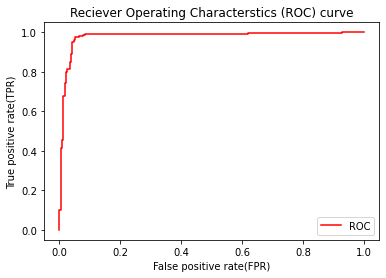

In [91]:
#ploting the roc curve
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,label="ROC" ,color="red")
    plt.xlabel("False positive rate(FPR)")
    plt.ylabel("True positive rate(TPR)")
    plt.title("Reciever Operating Characterstics (ROC) curve")
    plt.legend()
    plt.show()
plot_roc_curve(tpr,fpr)